# AidSDK部署-ImageNet1000-预测单张图像

同济子豪兄 2023-6-25

本代码在AidLux手机端运行

## 导入工具包

In [1]:
import cv2
from cvs import *

import numpy as np

import aidlite_gpu

import matplotlib.pyplot as plt
%matplotlib inline

## 载入模型

In [2]:
model_path = 'resnet18_imagenet.tflite'

In [3]:
NUM_CLASS = 1000 # 指定类别个数

In [4]:
aidlite = aidlite_gpu.aidlite()

# 模型路径 输入维度 输出维度 线程数 是否开启NNAPI
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_4fast_annmodel
aidlite.FAST_ANNModel(model_path, [256*256*3*4], [NUM_CLASS*4], 3, 0)

[2023-08-04 22:39:25,691134][/tmp/ipykernel_25071/1686280459.py:1 <module>][DEBUG]:=======init


Result(id=1, result='load model ok!', error=None)

## 载入图像

In [5]:
img_path = 'cat1.jpg'

In [6]:
img_bgr = cv2.imread(img_path)

In [7]:
img_bgr.shape

(800, 600, 3)

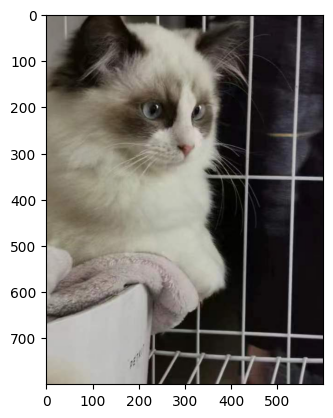

In [8]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 图像预处理

In [9]:
# 尺寸缩放
img_tensor = cv2.resize(img_bgr, (256, 256))

# 三通道的均值
mean = (0.485, 0.456, 0.406)

# 三通道的标准差
std = (0.229, 0.224, 0.225)

# 归一化
img_tensor = ((img_tensor / 255) - mean) / std
img_tensor = img_tensor.astype('float32')

## 推理预测

In [10]:
# 装填数据
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_5setinput_float32
aidlite.setInput_Float32(img_tensor)

Result(id=91, result=None, error=None)

In [11]:
# 推理预测
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_7invoke
aidlite.invoke() 

Result(id=91, result=None, error=None)

In [12]:
# 获得推理预测结果
result = aidlite.getOutput_Float32()

## 解析预测结果

In [13]:
result.shape

(1000,)

In [14]:
# # 每个类别的 logit 分数（非置信度）
# result

In [15]:
# 置信度最高类别 ID
pred_id = np.argmax(result)

In [16]:
pred_id

284

## 载入类别名称与ID映射表

In [17]:
# 英文类别名称
idx_to_labels = np.load('imagenet1000_idx_to_labels_en.npy', allow_pickle=True).item()

In [18]:
pred_class = idx_to_labels[pred_id]

In [19]:
pred_class

'Siamese_cat'

## 将预测类别名称写在图片上

In [20]:
# 图片，字符串，左上角坐标，字体，字体大小，颜色，字体粗细
img_output = cv2.putText(img_bgr, pred_class, (130, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

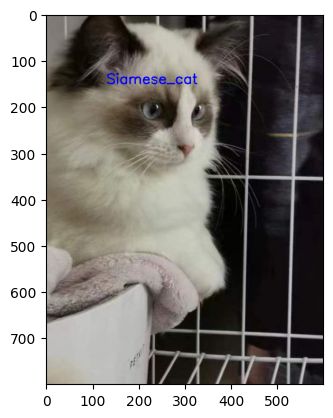

In [21]:
plt.imshow(img_output[:,:,::-1])
plt.show()

## 将预测结果显示在手机屏幕上

In [22]:
cvs.imshow(img_output)

remi.server      INFO     Started httpserver http://0.0.0.0:36279/


('app runs on port:', 36279)


remi.request     INFO     built UI (path=/)
remi.server.ws   INFO     connection established: ('127.0.0.1', 51858)
remi.server.ws   INFO     handshake complete
remi.request     ERROR    error processing GET request
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 622, in do_GET
    self._process_all(path)
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 704, in _process_all
    self.wfile.write(content)
  File "/usr/lib/python3.7/socketserver.py", line 799, in write
    self._sock.sendall(b)
BrokenPipeError: [Errno 32] Broken pipe
remi.server.ws   ERROR    Error managing incoming websocket message
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 175, in read_next_message
    self.on_message(from_websocket(decoded))
  File "/usr/local/lib/python3.7/dist-packages/remi/server.py", line 245, in on_message
    self.send_message(_MSG_ACK)
  File "/usr/local/lib/py